

## **Import Dependencies**

In [1]:
# import cupy as cp 
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer as timer




## **Now, we will create a Mandelbrot Fractal GIF!**

In [9]:
def plot_mandelbrot(k, cmap):
  def f(z, c, k):
    return z**k + c

  def diverge(c, z = 0, iterations = 20, boundary = 20000):
    c = complex(*c)
    for i in range(iterations):
      z = f(z, c, k)
      if abs(z) > boundary:
        return 1 #diverges
    return 0
  
  resolution = 200 #200 points between minimum and maximum
  xmin, xmax = -2, 1
  ymin, ymax = -1, 1

  xx, yy = np.meshgrid(np.linspace(xmin, xmax, resolution), 
                      np.linspace(ymin, ymax, resolution))

  points = np.c_[xx.ravel(), yy.ravel()]
  mandelbrot = [diverge(c) for c in points]
  mandelbrot = np.array(mandelbrot).reshape(200, 200)
  plt.contourf(mandelbrot, cmap = cmap)

Mandelbrot created in 0.228066 sec.


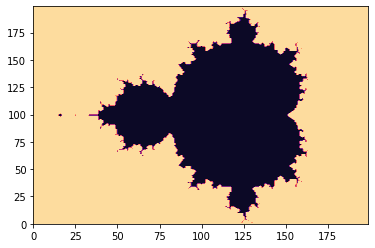

In [8]:
start = timer()

plot_mandelbrot(2, "magma")

end = timer() - start
print("Mandelbrot created in %f sec." % end)

**You can choose whatever shader you want for the fractal!**


All the colormaps can be found using this link: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Mandelbrot GIF created in 120.439479 sec.


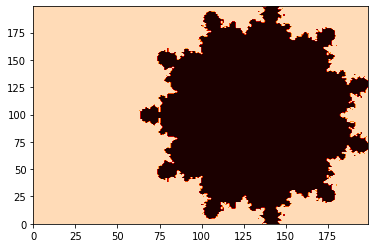

In [ ]:
!mkdir mandelbrot_plots
import imageio

series = np.linspace(2, 12, 100)
start = timer()
for n in series:
  plot_mandelbrot(n, cmap = "gist_heat")
  plt.savefig(f"mandelbrot_plots/mandelbrot_{n}.jpg")


end = timer() - start
print("Mandelbrot GIF created in %f sec." % end)

gif = [] 
# get the path/directory

files = [f"mandelbrot_plots/mandelbrot_{n}.jpg" for n in series]

for image in files:
  gif.append(imageio.imread(image))
imageio.mimsave('mandelbrot.gif', gif)

**Open mandelbrot.gif under the mandelbrot_plots and look at your stunning Mandelbrot Fractal GIF!**

In [ ]:
# import shutil
# shutil.rmtree("/mandelbrot_plots")
# To remove the mandelbrot fractal images and create another GIF, uncomment and run the code above